In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    if not hasattr(n, "label"):
        n.label = "value"
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [6]:
class Value:
    def __init__(self, data, _children=(), _op='', label="value"):
        self.data = data
        self.grad = float(0)
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

h = 0.0001

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

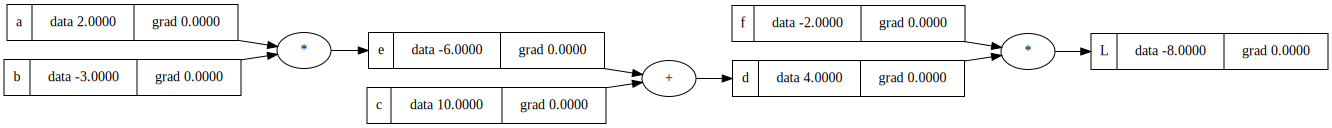

In [4]:
draw_dot(L)

In [ ]:
dL/dd = f

(f(x + h) / f(x)) / h

In [8]:
L.grad = 1.0

NameError: name 'L' is not defined

In [7]:
def lol():
    h = 0.0004
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e + c
    f = Value(-2.0)
    L = d * f
    L1 = L.data
    
    a = Value(2.0 + h)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e + c
    f = Value(-2.0)
    L = d * f
    L2 = L.data
    
    print((L2-L1)/h) # prints derivative of l with respect to a

lol()

5.999999999999339
